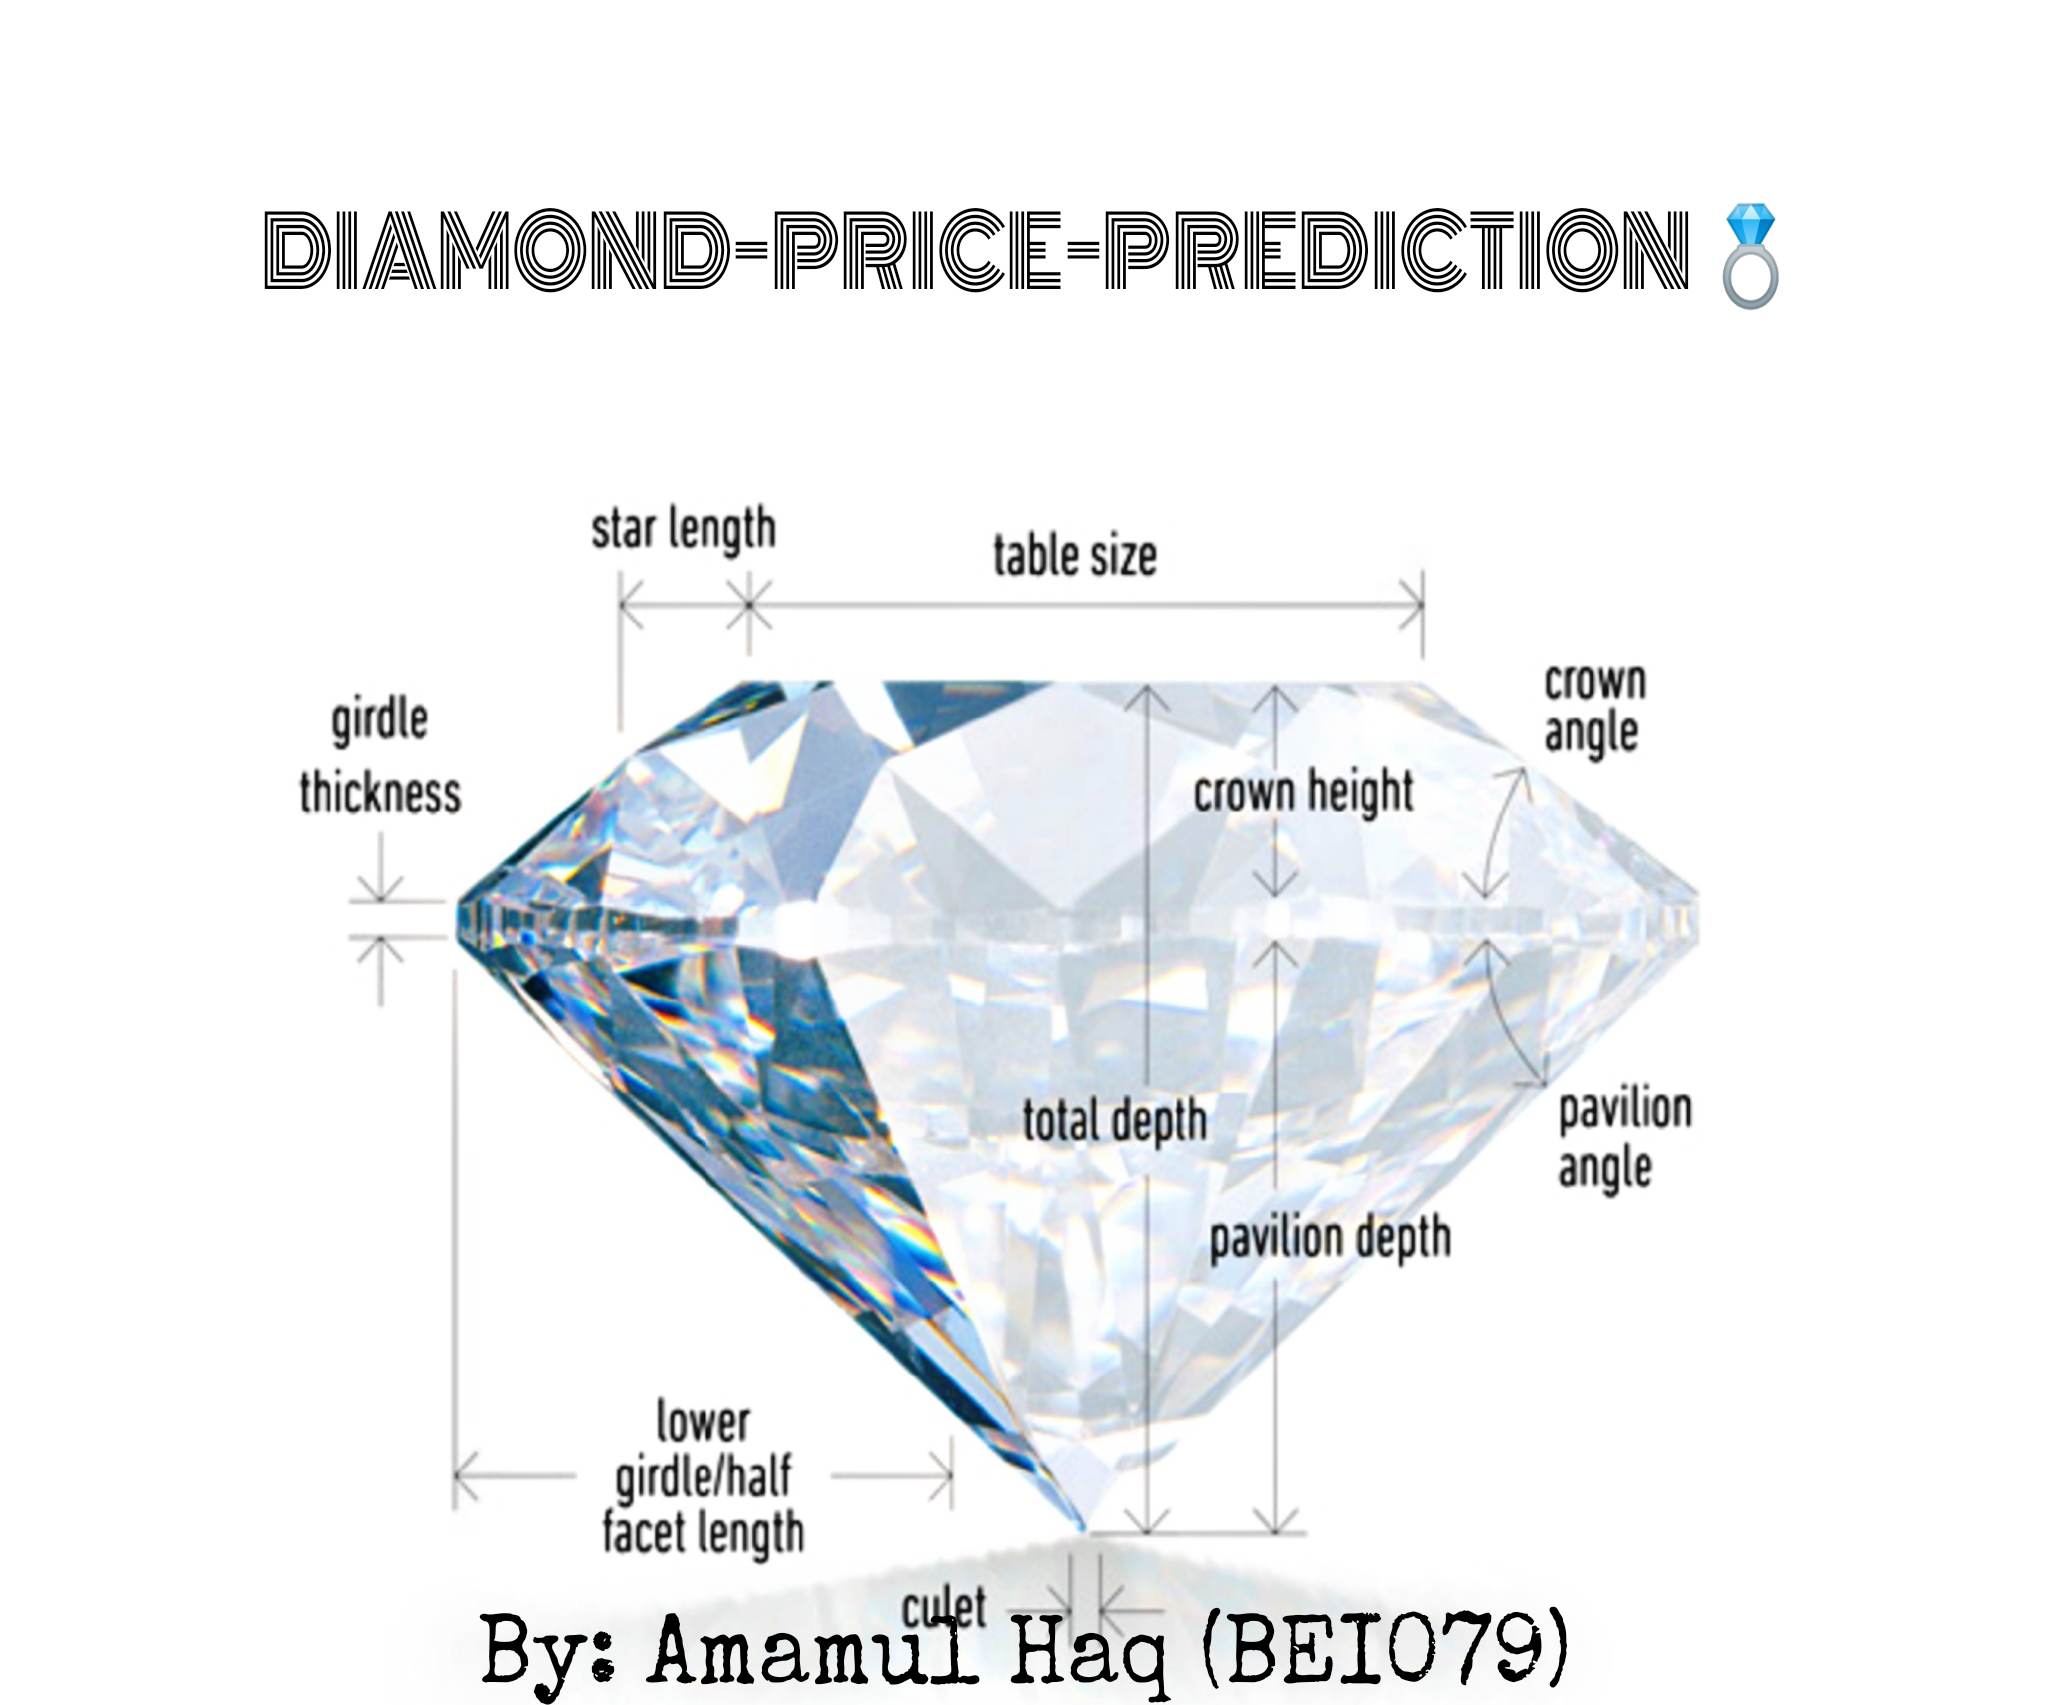

In [ ]:
#!pip install kaggle

In [ ]:
#!mkdir -p ~/.kaggle
#!cp kaggle.json ~/.kaggle/
#!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#!kaggle datasets list
!pip install pandas

In [1]:
#Imported necessary libraries for this project
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import  LinearRegression
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'numpy'

<h2>DIAMOND</h2> is a precious gemstone of carbon atoms arranged in a crystal structure called diamond cubic.<br>
Harry Winston,Cartier,De Beers are international diamond companies.M<br>
This dataset is based on Gemological Institute of America(GIA) reports for transparency of the diamond market.

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DiamondsPrices.csv")
data.head()

NameError: name 'pd' is not defined

In [2]:

data.shape

NameError: name 'data' is not defined

<h2>4C & features of diamond<h3>
Four Cs used to assess and grade the quality of a diamond.
<h3>Carat(5 carat = 1 gm):<h6>The carat is the diamond’s physical weight measured in metric carats.
<h3>Cut (Fair, Good, Very Good, Premium, Ideal)<h6>A well-cut diamond reflects light beautifully, enhancing its brilliance and sparkle.  
<h3>Color(from J worst to D best): <h6>The presence or absence of color in a diamond determines overall quality and value.
<h3>Clarity(I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)):<h6>Based on the presence and visibility of these imperfections known as blemishes.
<h3>Dimensions(in mm):<h6>x length in mm (0--10.74)<br>y width in mm (0--58.9)<br>z depth in mm (0--31.8)
<h3>Depth<h6>(43% to 79%) = z/mean(x,y) = 2*z/(x+y)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [ ]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [ ]:
#Dropping dimentionless (2-D or 1-D) diamonds and their outlayers
data = data[(data["depth"]<75)&(data["depth"]>45)]
data = data[(data["table"]<80)&(data["table"]>40)]
data = data[(data["x"]<30)]
data = data[(data["y"]<30)]
data = data[(data["z"]<30)&(data["z"]>2)]
data.shape

(53907, 10)

In [ ]:
#To calculate various measures such as count, mean, standard deviation, and percentiles.
data.describe()

,carat,depth,table,price,x,y,z
count,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000
mean,0.797628,61.749741,57.455948,3930.584470,5.731463,5.733292,3.539441
std,0.473765,1.420119,2.226153,3987.202815,1.119384,1.111252,0.691434
min,0.200000,50.800000,43.000000,326.000000,3.730000,3.680000,2.060000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5322.000000,6.540000,6.540000,4.040000
max,5.010000,73.600000,79.000000,18823.000000,10.740000,10.540000,6.980000


<ipython-input-12-64617a8f4e20>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='color', palette=custom_palette)


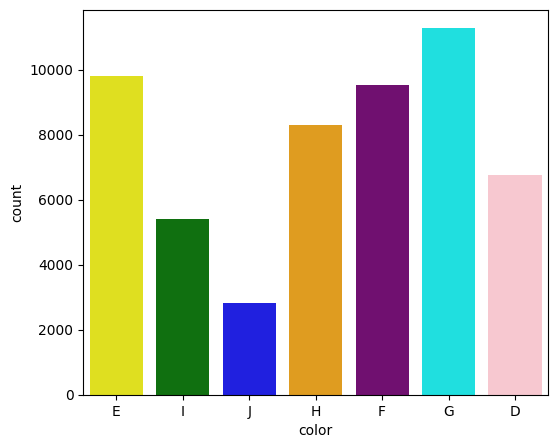

In [ ]:
#A count plot is similar to a bar plot and a histogram and provides counts of categorical values.
plt.figure(figsize=(6, 5))
custom_palette = ["yellow", "green", "blue", "orange", "purple","cyan","pink"]
sns.countplot(data=data, x='color', palette=custom_palette)
plt.show()

<ipython-input-13-c8d9e51d3d1c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()
<ipython-input-13-c8d9e51d3d1c>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap=custom_cmap, fmt=".2f", linewidths=.5)


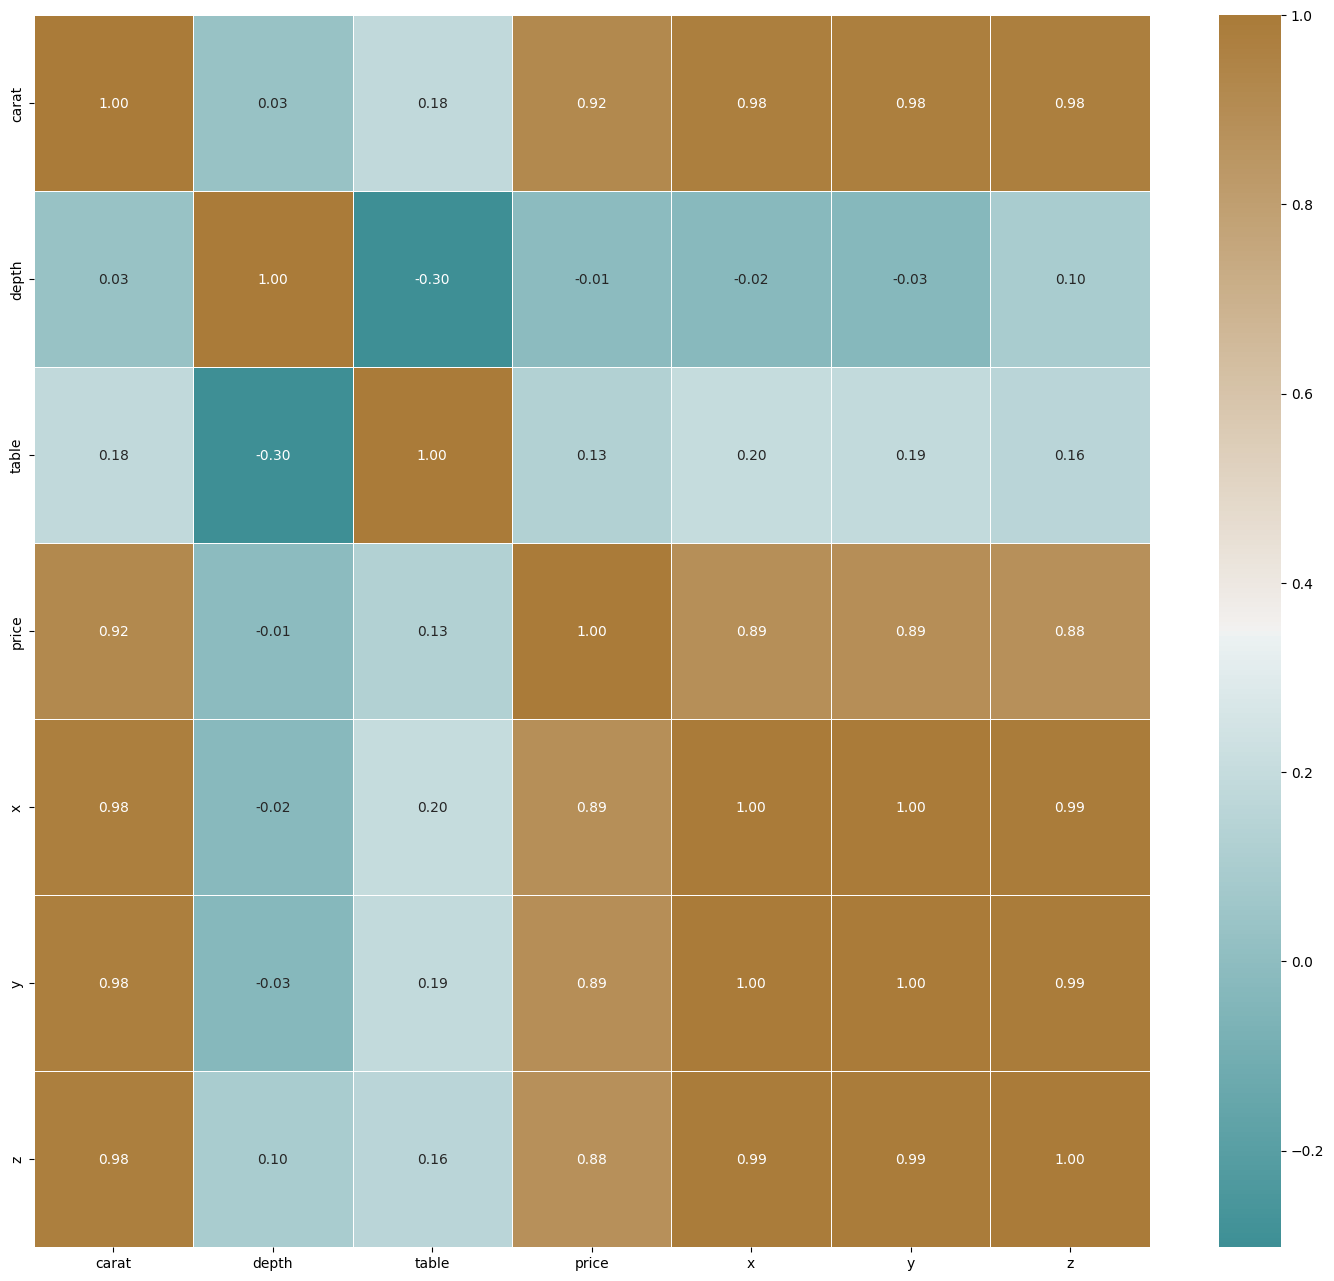

In [ ]:
# for displaying correlations, patterns, or distributions within a dataset
correlation = data.corr()
plt.figure(figsize=(18, 16))
custom_cmap = sns.diverging_palette(200, 50, s=80, l=55, n=9, as_cmap=True)

sns.heatmap(data.corr(), annot=True, cmap=custom_cmap, fmt=".2f", linewidths=.5)
plt.show()

In [ ]:
# correlation value of price
print(correlation['price'])

carat    0.921590
depth   -0.010287
table    0.127108
price    1.000000
x        0.887212
y        0.888807
z        0.882634
Name: price, dtype: float64


<ipython-input-15-af122e4a80bf>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['price'],color='green')


<Axes: xlabel='price', ylabel='Density'>

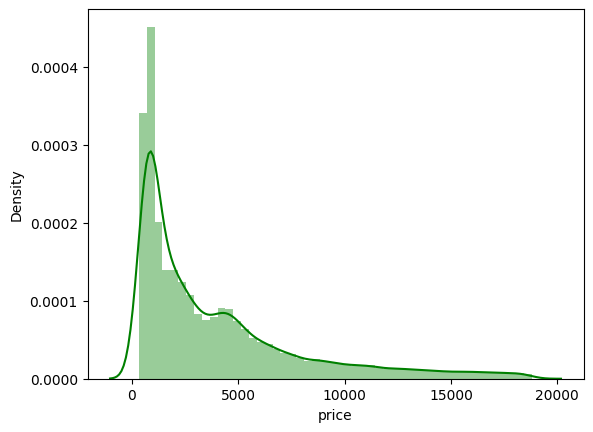

In [ ]:
#distibution of the diamond price
sns.distplot(data['price'],color='green')

Lable encoding the data to get rid of object dtype i.e in to numeric form

---



In [ ]:
data= data.drop(['depth','table','x','y','z'],axis=1)

In [ ]:
data.head()

,carat,cut,color,clarity,price
0,0.23,Ideal,E,SI2,326
1,0.21,Premium,E,SI1,326
2,0.23,Good,E,VS1,327
3,0.29,Premium,I,VS2,334
4,0.31,Good,J,SI2,335


In [ ]:
l1=LabelEncoder()
label=l1.fit_transform(data['cut'])
data['cut_label']=label


In [ ]:
l2=LabelEncoder()
label2=l2.fit_transform(data['clarity'])
data['clarity_label']=label2

In [ ]:
data['color']=data['color'].map({'D':1,'E':2,'F':3,'G':4,'H':5,'I':6,'J':7})

In [ ]:
data.head()

,carat,cut,color,clarity,price,cut_label,clarity_label
0,0.23,Ideal,2,SI2,326,2,3
1,0.21,Premium,2,SI1,326,3,2
2,0.23,Good,2,VS1,327,1,4
3,0.29,Premium,6,VS2,334,3,5
4,0.31,Good,7,SI2,335,1,3


MODELING

In [ ]:
Y=data['price']
X = data.drop(['price', 'cut', 'clarity'], axis=1)

X.head(1)

,carat,color,cut_label,clarity_label
0,0.23,2,2,3


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# Feature Scaling
s = StandardScaler()
X_train =s.fit_transform(X_train)
X_test = s.fit_transform(X_test)

Decision Regression

In [ ]:
reg=DecisionTreeRegressor()
reg.fit(X_train,Y_train)
pred1=reg.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
dtr=r2_score(Y_test,pred1)*100
print(dtr)

96.53285283752172


Random Forest Classifier

In [ ]:
rf = RandomForestRegressor(n_estimators=10)
rf.fit(X_train,Y_train)
pred2=rf.predict(X_test)

In [ ]:
rfr=r2_score(Y_test,pred2)*100
print(rfr)

97.37806934649481


Linear Regression

In [ ]:
lin = LinearRegression()
lin = lin.fit(X_train,Y_train)
pred3 = lin.predict(X_test)

In [ ]:
lr=r2_score(Y_test,pred3)*100
print(lr)

87.25946273409646


In [ ]:
#overall accuracy score
print("Linear Regression: ",lr)
print("Decision Regression: ",dtr)
print("Random Forest Classifier: ",rfr)

Linear Regression:  87.25946273409646
Decision Regression:  96.53285283752172
Random Forest Classifier:  97.37806934649481


PREDICTION

In [ ]:
def prediction():
    carat = float(input("Enter the value of carat (0.2 to 5): "))
    cut = int(input("Enter the value of cut(1 to 5): "))
    clarity = int(input("Enter the value of clarity(0 to 7): "))
    color = int(input("Enter the value of color (1 to 7): "))

    price = rf.predict([[carat, cut, clarity, color]])
    print(f"Approximately price of diamond is RS {price} ")

pred = prediction()


Enter the value of carat (0.2 to 5): 5
Enter the value of cut(1 to 5): 7
Enter the value of clarity(0 to 7): 4
Enter the value of color (1 to 7): 7
Approximately price of diamond is RS [18511.76] 
